<a href="https://colab.research.google.com/github/Matheus-Pombeiro/dataviz_comparison_distribution_charts/blob/main/comparison_distribution_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison and distribution charts

## Configurações iniciais

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Obtendo a url da base de dados
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/dataviz_comparison_distribution_charts/refs/heads/main/relatorio_vendas.csv'

In [4]:
# Lendo o dataset
vendas = pd.read_csv(url)

# Convertendo o tipo das datas
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

# Exibindo o dataframe
vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [5]:
# Verificando os dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

## Comparando dados

In [6]:
# Copiando o df
df_vendas_ano = vendas.copy()

# Selecionando colunas
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Extraindo o ano
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year

# Removendo uma coluna
df_vendas_ano.drop(labels='data_pedido', axis=1, inplace=True)

# Agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby('ano')['vendas'].sum()

# Exibindo o df
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


In [7]:
# Resetando o index
df_vendas_ano = df_vendas_ano.reset_index()

# Convertendo em um df
df_vendas_ano.columns = ['Ano', 'Vendas']

# Exibindo o df
df_vendas_ano

,Ano,Vendas
0,2016,1402652.33
1,2017,1489179.52
2,2018,1884161.41
3,2019,2305006.29


<ipython-input-8-30530b2ba9af>:11: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_vendas_ano, x='Ano', y='Vendas', palette=cores, hue='Vendas', legend=False)


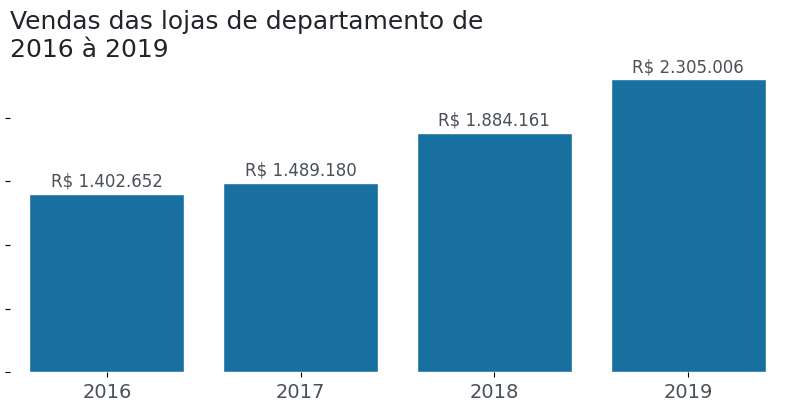

In [8]:
# Definindo uma função para plottar gráficos de colunas
def grafico_vendas(cores: list=[AZUL2]):

  # Gerando uma figura
  fig, ax = plt.subplots(figsize=(10, 4))

  # Configurando o tema
  sns.set_theme(style='white')

  # Plottando um gráfico de colunas
  ax = sns.barplot(data=df_vendas_ano, x='Ano', y='Vendas', palette=cores, hue='Vendas', legend=False)

  # Adicionando um título
  ax.set_title('Vendas das lojas de departamento de\n2016 à 2019', loc='left', fontsize=18, color=CINZA1)

  # Removendo os labels
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Aumentando os rótulos
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)

  # Removendo bordas
  sns.despine(left=True, bottom=True)

  # Limpando os labels do eixo y
  ax.set_yticklabels([])

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(df_vendas_ano['Vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e5
    ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12, ha='center', va='center')

  # Retornando o eixo
  return ax

# Chamando a função
ax = grafico_vendas()

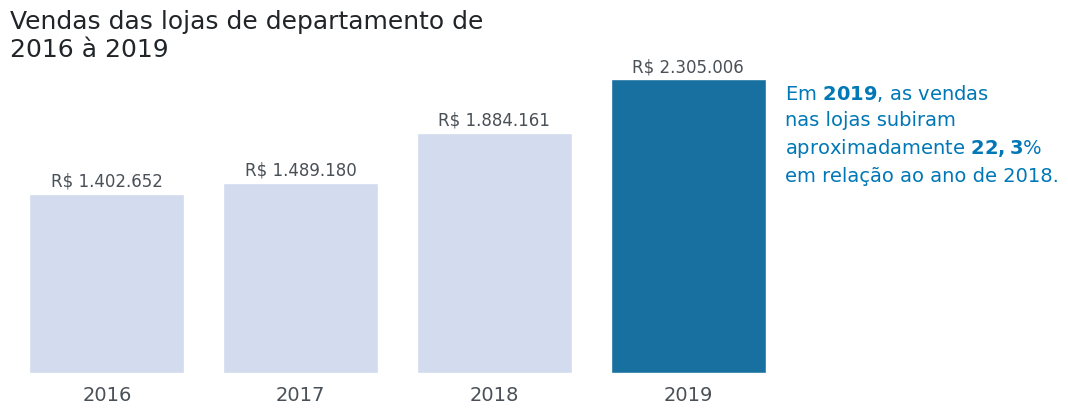

In [9]:
# Definindo cores para o gráfico
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, 'Vendas'] == df_vendas_ano.Vendas.max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Chamando a função
ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

# Obtendo a figura
fig = ax.get_figure()

In [10]:
# Copiando o df
top_lucro = vendas.copy()

# Selecionando os dados
top_lucro = top_lucro[['tipo_produto', 'lucro']]

# Agrupando os dados por tipo de produto
top_lucro = top_lucro.groupby('tipo_produto')['lucro'].sum().sort_values(ascending=False)

# Obtento apenas o top 7
top_7 = top_lucro.head(7)

# Exibindo o df
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


In [11]:
# Resetando o index
top_7 = top_7.reset_index()

# Convertendo para um df
top_7.columns = ['tipo_produto', 'lucro']

# Exibindo o df
top_7

,tipo_produto,lucro
0,peças de reposição,91148.67
1,pneus,67460.05
2,ferramentas automotivas,63330.22
3,pesticidas,53343.89
4,ferramentas de jardinagem,53202.88
5,ferramentas,41020.34
6,vasos,33941.85


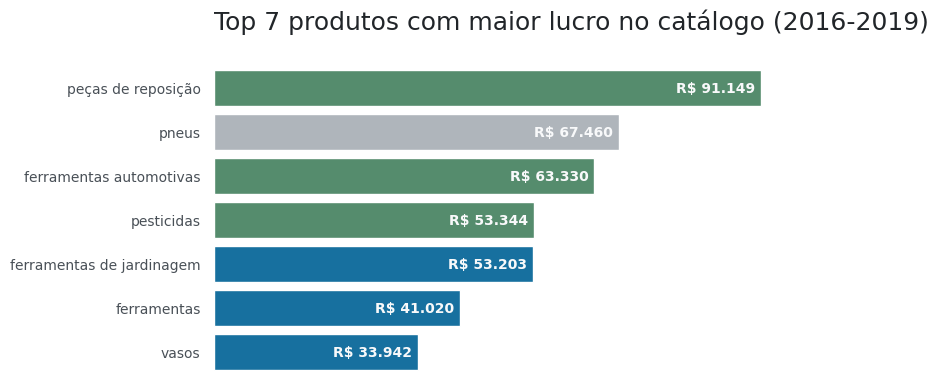

In [12]:
# Definindo uma função para plottar gráficos de colunas
def grafico_top_7(cores: list=[AZUL2]):

  # Gerando uma figura
  fig, ax = plt.subplots(figsize=(10, 4))

  # Liberando espaço à direita da figura para o texto
  fig.subplots_adjust(right=0.7)

  # Configurando o tema
  sns.set_theme(style='white')

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  # Plottando um gráfico de colunas
  ax = sns.barplot(data=top_7, x='lucro', y='tipo_produto', palette=cores, hue='lucro', legend=False)

  # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
    qtd =f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e3  # Offset de 1.000
    ax.text(valor - offset, i, qtd, color=CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  # Retornando o eixo
  return ax

# Chamando a função
ax = grafico_top_7()

In [13]:
# Colorindo o texto
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

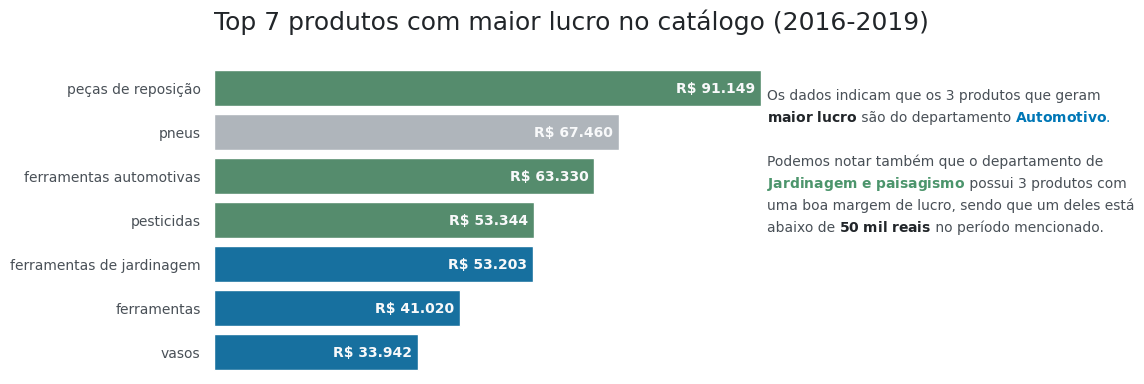

In [14]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

## Aula 1 - desafio

In [15]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [16]:
# Criando um df com os dados desejados
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[["data_pedido", "lucro"]]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_lucro_ano["ano"] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels = "data_pedido", axis = 1, inplace=True)

# Agrupando os dados por ano
df_lucro_ano = df_lucro_ano.groupby(["ano"]).aggregate("sum")

df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


In [17]:
# Resetando o index
df_lucro_ano = df_lucro_ano.reset_index()

# Convertendo para df
df_lucro_ano.columns = ['ano', 'lucro']

# Exibindo o df
df_lucro_ano

,ano,lucro
0,2016,75033.63
1,2017,101265.15
2,2018,129862.44
3,2019,148097.30


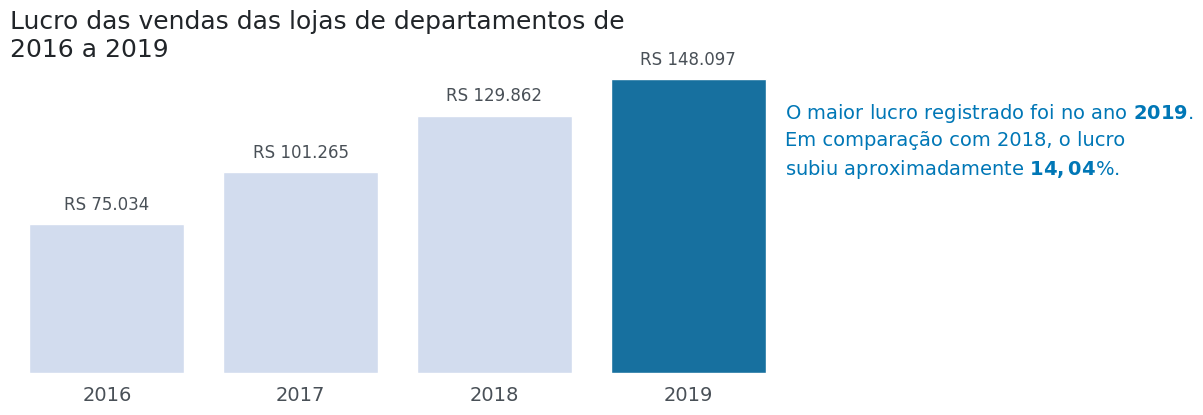

In [18]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style="white")

# Definindo as cores
cores = []
for ano in df_lucro_ano.index:
  if df_lucro_ano.loc[ano, 'lucro'] == df_lucro_ano['lucro'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Gerando o gráfico de colunas
ax = sns.barplot(data = df_lucro_ano, x ='ano',
                 y="lucro", palette = cores,
                 hue='lucro', legend=False)

# Personalizando o gráfico
ax.set_title("Lucro das vendas das lojas de departamentos de\n2016 a 2019",
             loc="left", fontsize = 18, color = CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine(left= True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano['lucro']):
  qtd = f'RS {valor:,.0f}'.replace(',', '.')
  offset = 1e4
  ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12, ha='center', va='center')

# Anotando uma conclusão no gráfico
ax.text(3.5, 1e5,
        'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
         'Em comparação com 2018, o lucro\n'
         'subiu aproximadamente $\\bf{14,04}$%.',
        fontsize=14, linespacing=1.45, color=AZUL2)

# Exibindo o gráfico
plt.show()

In [19]:
# Criando um df com os dados desejados
fat_produto = vendas.copy()
fat_produto = fat_produto[["tipo_produto", "vendas"]]

# Agrupando os dados por tipo_produto, ordenando de maneira decrescente pelas vendas e selecionando os 10 primeiros
fat_produto = fat_produto.groupby(["tipo_produto"]).agg("sum").sort_values("vendas", ascending = False)
top_10 = fat_produto[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [20]:
# Resetando o index
top_10 = top_10.reset_index()

# convertendo em df
top_10.columns = ['tipo_produto', 'vendas']

# Exibindo o df
top_10

,tipo_produto,vendas
0,pneus,1022428.97
1,ferramentas,995158.41
2,vasos,696044.18
3,ferramentas de jardinagem,648879.72
4,materiais de revestimento,629656.36
5,equipamentos de limpeza,542304.58
6,ferramentas automotivas,502109.29
7,peças de reposição,486907.94
8,encanamentos,373223.88
9,mobiliário de exterior,328932.27


In [21]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

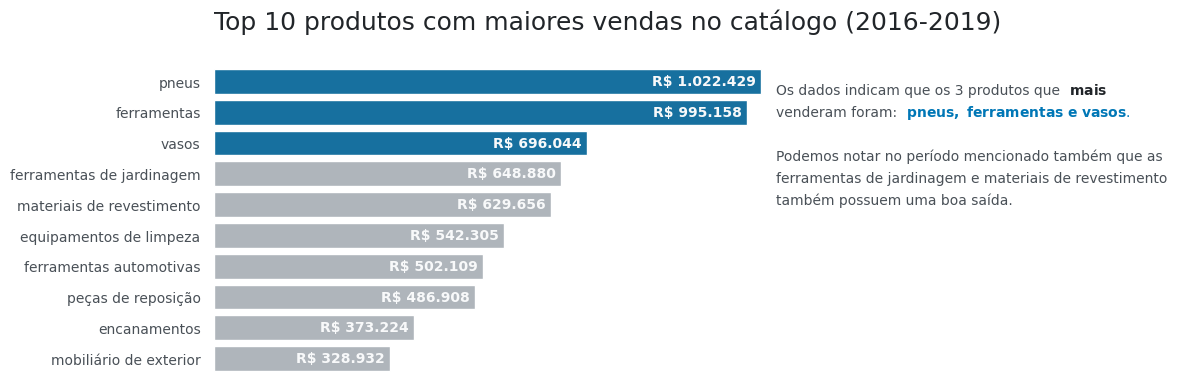

In [22]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.7)
sns.set_theme(style="white")

# Definindo as cores do gráfico: 3 primeiro em azul e restante em cinza
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

# Gerando o gráfico de barras
ax = sns.barplot(data = top_10, x="vendas", y ='tipo_produto', palette = cores, hue='tipo_produto')

# Personalizando o gráfico
ax.set_title('Top 10 produtos com maiores vendas no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(top_10['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e4  # offset de 10.000
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

# Gerando o texto colorido
texto_colorido(
    1.05e6, 4,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

# Exibindo o gráfico
plt.show()

## Agrupando dados

In [23]:
# Criando um df com os dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['data_pedido','regiao', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels = "data_pedido", axis = 1, inplace = True)

df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [24]:
# Cruzando dados em um df
vendas_reg = pd.crosstab(index=df_vendas_reg['ano'], columns=df_vendas_reg['regiao'],
                         values=df_vendas_reg['vendas'], aggfunc='sum')

# Ajustando a tabela em ordem descrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


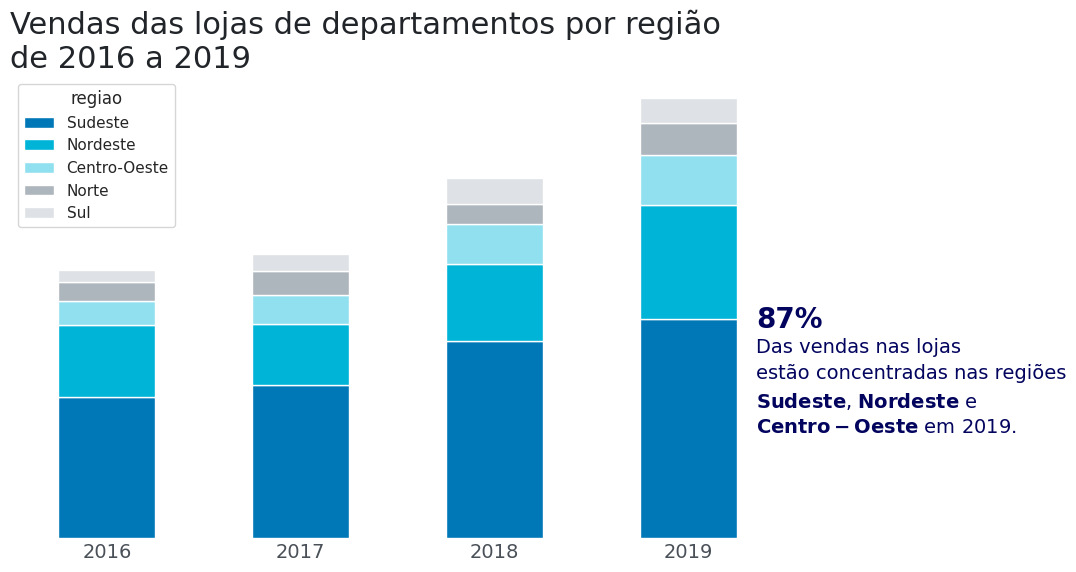

In [25]:
## Gerando a função para criar o gráfico de barras
def grafico_vendas_regiao():

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  # Gerando o gráfico de barras empilhadas
  ax = vendas_reg.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)

  # Adicionando um título
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)

  # Adicionando labels
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Removendo os ticklabels do eixo y
  ax.set_yticklabels([])

  # Rotacionando os ticklabels do eixo x
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)

  # Removendo todos os ticks dos eixos x e y, menos os ticklabels
  ax.tick_params(axis='both', which='both', length=0)

  # Anotando uma conclusão no gráfico
  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
          'Das vendas nas lojas\n'
          'estão concentradas nas regiões\n'
          '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
          '$\\bf{Centro-Oeste}$ em 2019.',
          fontsize=14, linespacing=1.45,
          color=AZUL1)

  # Removendo as bordas (frames)
  ax.set_frame_on(False)

  # Retonando o gráfico
  return ax

# Chamando a função
grafico_vendas_regiao();

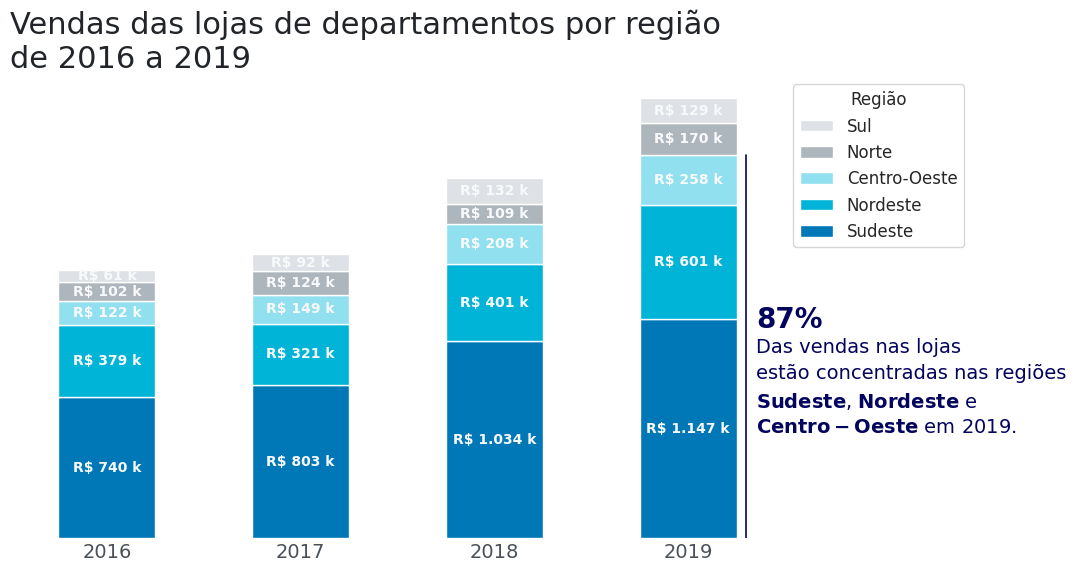

In [26]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_vendas_regiao()

# Adicionando legenda
ax.legend(bbox_to_anchor=(1, 1), reverse=True, title='Região', title_fontsize=12, fontsize=12)
# bbox_to_anchor = determinan a posição do elemento na figura (1, 1) == canto superior direito

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f} k'.replace(',', '.') for valor in container]
  ax.bar_label(container, label_type='center', labels=labels,
               size=10, color=CINZA5, fontweight='bold')

# Adicionando uma linha lvertical para identificar as variáveis
ax.axvline(x=3.3, ymin=0, ymax=0.83, color=AZUL1, linewidth=1.2)

# Obtendo a figura
fig = ax.get_figure()

In [27]:
# Criando um df com os dados desejados
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

# Cruzando os dados categóricos
df_envio_seg = pd.crosstab(index=df_envio.modo_envio, columns=df_envio.segmento_cliente).sort_values('B2B')

# Exibindo os dados
df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [28]:
# Normalizando o df
df_envio_normalizado = pd.crosstab(index=df_envio.modo_envio, columns=df_envio.segmento_cliente, normalize='index')

# Normalizar = soma os valores e divide pelos seus pesos (valor / total)

# Exibindo o df
df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


In [29]:
# Importando o módulo transforms do matplotlib para colorir o texto do gráfico
from matplotlib import transforms

# Declarando uma função para colorir o texto
def text_colorido(x, y, texto, cores, esp=20, ax=None, **kw):

  # Obtém as cores e outras informações
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  # Percorre o texto e personaliza-o
  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color=cor, transform=t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

    t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

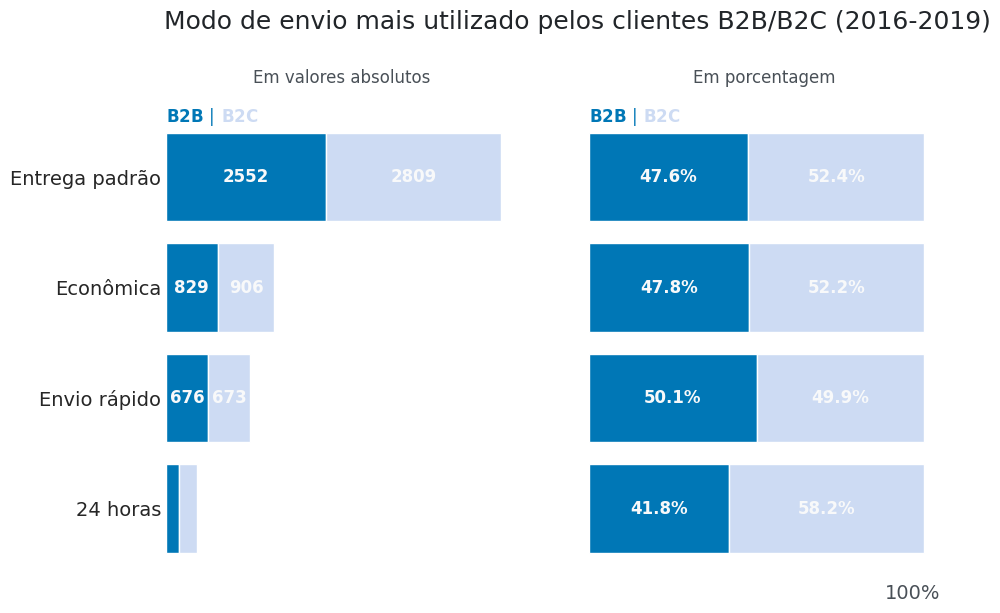

In [30]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(10,6), sharey = True)

# Cores
cores = [AZUL2, AZUL5]

# GRÁFICO 1 - Barras empilhadas
axs[0].barh(df_envio_seg.index, df_envio_seg["B2B"], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg["B2C"], left = df_envio_seg["B2B"], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

# GRÁFICO 2 - Barras empilhadas 100 %
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()

## Aula 2 - desafio

In [31]:
# Criando um data frame com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido', 'regiao', 'estado', 'vendas']]

# Obtendo apenas os anos
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando os dados
vendas_co = vendas_co.query('regiao == "Centro-Oeste" and (ano == 2017 or ano == 2018)')

# Removendo colunas
vendas_co.drop(labels=['data_pedido', 'regiao'], axis=1, inplace=True)

# Exibindo o df
vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [32]:
# Criando uma tabela cruzada
vendas_co_ano = pd.crosstab(index=vendas_co.ano, columns=vendas_co.estado,
                            values=vendas_co.vendas, aggfunc='sum')

# Exibindo df
vendas_co_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


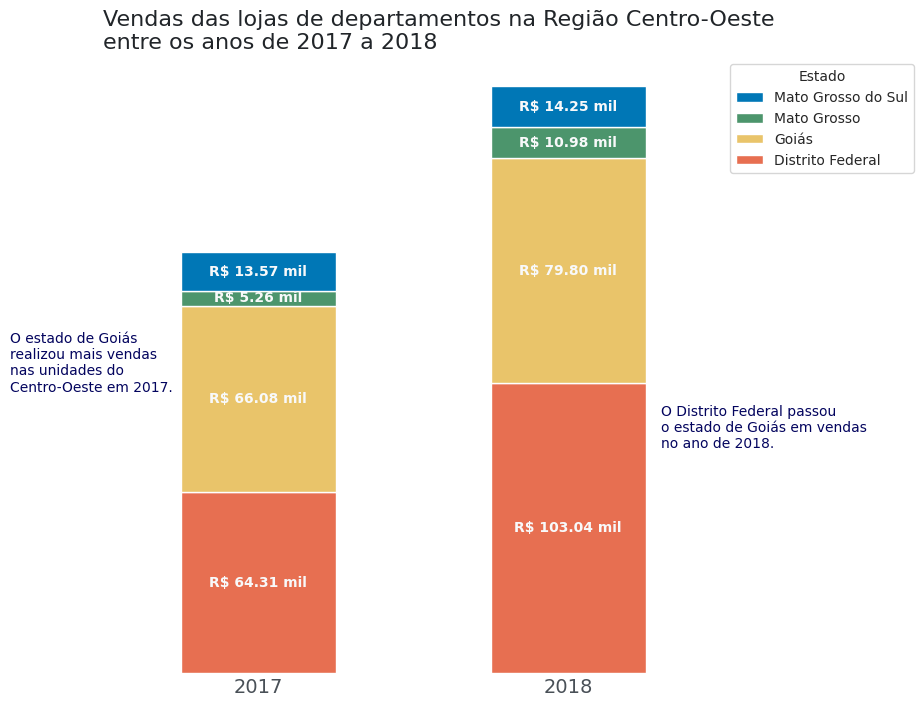

In [33]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando gráfico de colunas empilhadas
ax = vendas_co_ano.plot(kind='bar', stacked=True, figsize=(8, 8), color=cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
ax.set_frame_on(False)

# Removendo ticks dos eixos x e y
ax.tick_params(axis='both', which='both', length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1, 1), reverse=True, title='Estado', title_fontsize=10, fontsize=10)

# Adicionando valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(',', '.') for valor in container]
  ax.bar_label(container, label_type='center', labels=labels, size=10, color=CINZA5, fontweight='bold')

# Obtendo a figura
fig = ax.get_figure()

In [35]:
# Criando um df
df_depart = vendas.copy()

# Selecionando dados
df_depart = df_depart[['departamento','modo_envio']]

# Criando uma tabela cruzada com a frequência (porcentagem) de modo de envio por departamento
df_depart = pd.crosstab(index=df_depart.departamento, columns=df_depart.modo_envio, normalize='index')

# Exibindo o df
df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [36]:
# Definindo uma função para gerar textos colorido
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):

  # Obtendo cores e outras informações
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  # Percorrendo o texto e colorindo-o
  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color=cor, transform=t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

    t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

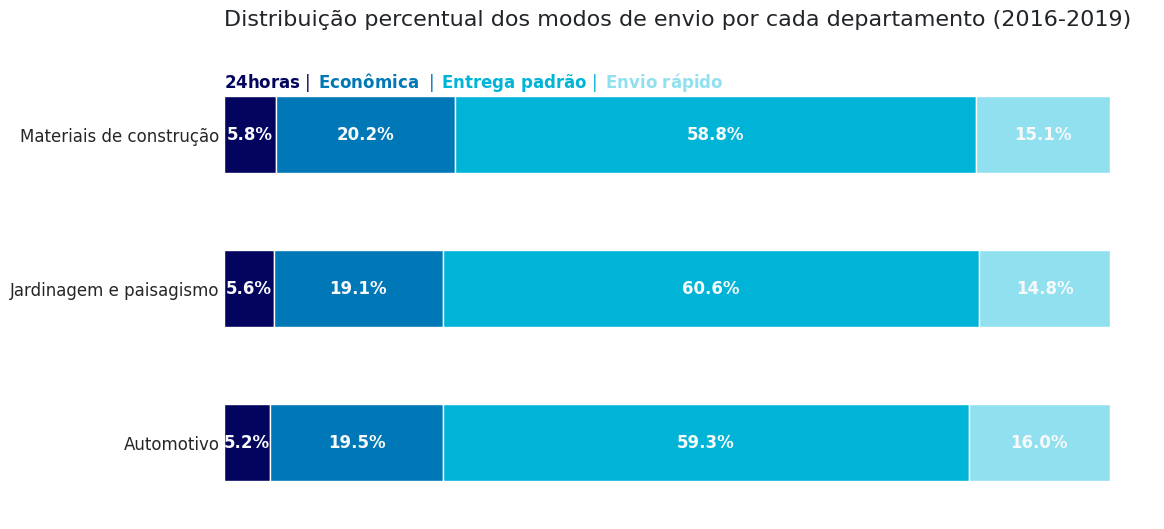

In [41]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico com barras empilhadas
ax = df_depart.plot(kind='barh', stacked=True, figsize=(12, 6), color=cores, legend=None)

# Personalizando o gráfico
ax.set_title('Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n',
             fontsize=16, loc='left', color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.set_frame_on(False)

# Removendo os ticks dos eixos x e y
ax.tick_params(axis='both', which='both', length=0)

# Colorindo os textos
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$',
               cores = [cores], ax=ax, fontsize=12)

# Adicioando valores às barras
for container in ax.containers:
  labels = [f'{valor.get_width()*100:.1f}%' for valor in container]

  ax.bar_label(container, label_type='center', labels=labels,
               size=12, color=CINZA5, fontweight='bold')

# Obtendo a figura
fig = ax.get_figure()